# classic CNN architectures

| Architecture        | Year | Description                                                                                                                                                                                        |
|---------------------|------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LeNet-5             | 1998 | 2 conv layers and 3 FC layers.|
| AlexNet             | 2012 | 5 conv layers, 3 FC layers, ReLU, dropout|
| VGG                 | 2014 | small filters in conv layers, 16/19 layers|
| GoogLeNet/Inception | 2014 | Inception module (multiple filter sizes and pooling operations in parallel). 22 layers|
| ResNet              | 2015 | residual blocks with shortcut connections, very deep (152 layers)|
| U-Net                    | 2015 | medical image segmentation, Autoencoder and skip connections. |
| DenseNet            | 2016 | multiple dense blocks with transition layers in between.|
| YOLO                     | 2016 | real-time object detection |
| Faster R-CNN             | 2016 | region-based object detection|
| Mask R-CNN               | 2017 | An extension of Faster R-CNN that adds a branch for predicting object masks|
| EfficientNet             | 2019 | compound scaling|
| Vision Transformer (ViT) | 2020 | self-attention to replace the traditional convolutional layers.               |

# CNN

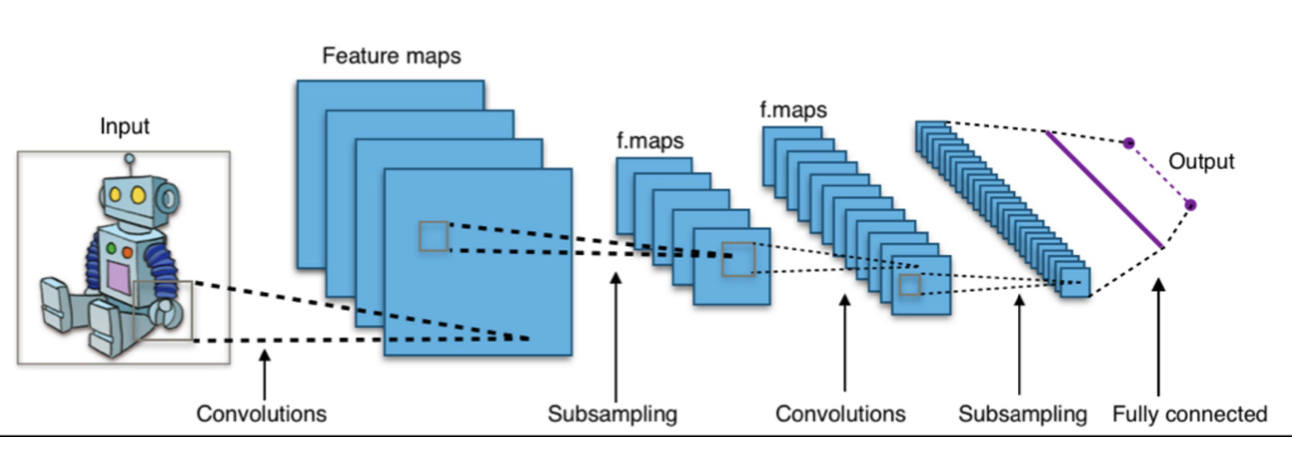

## 3 basic ideas

The three basic ideas behind convolutional neural networks (CNNs) are: Local receptive fields, Shared weights, Pooling

Local receptive fields: 

- Each neuron in a convolutional layer is only connected to a **small region** of previous layer, called the receptive field.

- the small learnable weight matrix of Local receptive field is called feature detector/filter/kernel/feature detector

- used to capture spatial information (local patterns and features) from an image.  an image is a 2D vector of pixel values, each pixel is a feature.eatures/patterns in images are localized, we can learn this features by scanning across images
    

Shared weights 

- In a convolutional layer, the same set of weights is applied to every receptive field in the previous layer bc same filter detect same feature 

- reduces the number of parameters in the network, faster training, allowing it to learn from less data and to generalize better.

Pooling

- a type of downsampling

- typically applied after a convolutional layer.

- capture the most salient features in the input, 

- reduce complexity, prevent overfitting: learn the rough location rather than exact location of feature, make CNN robust to noise and distortion

- reduce spatial size of output and create translation scale invariance. 

- several ways: max, average, L2

## translational invariance and scale invariance

CNN induce translational invariance and scale invariance in image features

Translational Invariance:

- CNN can recognize a pattern regardless of its **position** in the input image.

- Achieved by conv operation, which uses the same filters across the entire input.


Scale Invariance:

- recognize a pattern regardless of its **size** in the input image. crucial for object detection.

- Not present in standard CNN architecture, achieved by multi-scale techniques:

    - Data augmentation: transformations (scaling, resizing, cropping, etc.) are applied randomly to the input images during training. 

    - Image pyramids: Create a set of images with different resolutions of the same image, and process them separately or in combination.
    
    - Multi-scale feature extraction: filters in the same conv layer have different sizes. e.g.GoogLeNet.
    
    - Feature pyramids: conv layers with filters of at different depth. Building a hierarchical representation of features, where higher levels of the pyramid correspond to coarser (larger-scale) features and lower levels correspond to finer (smaller-scale) features.

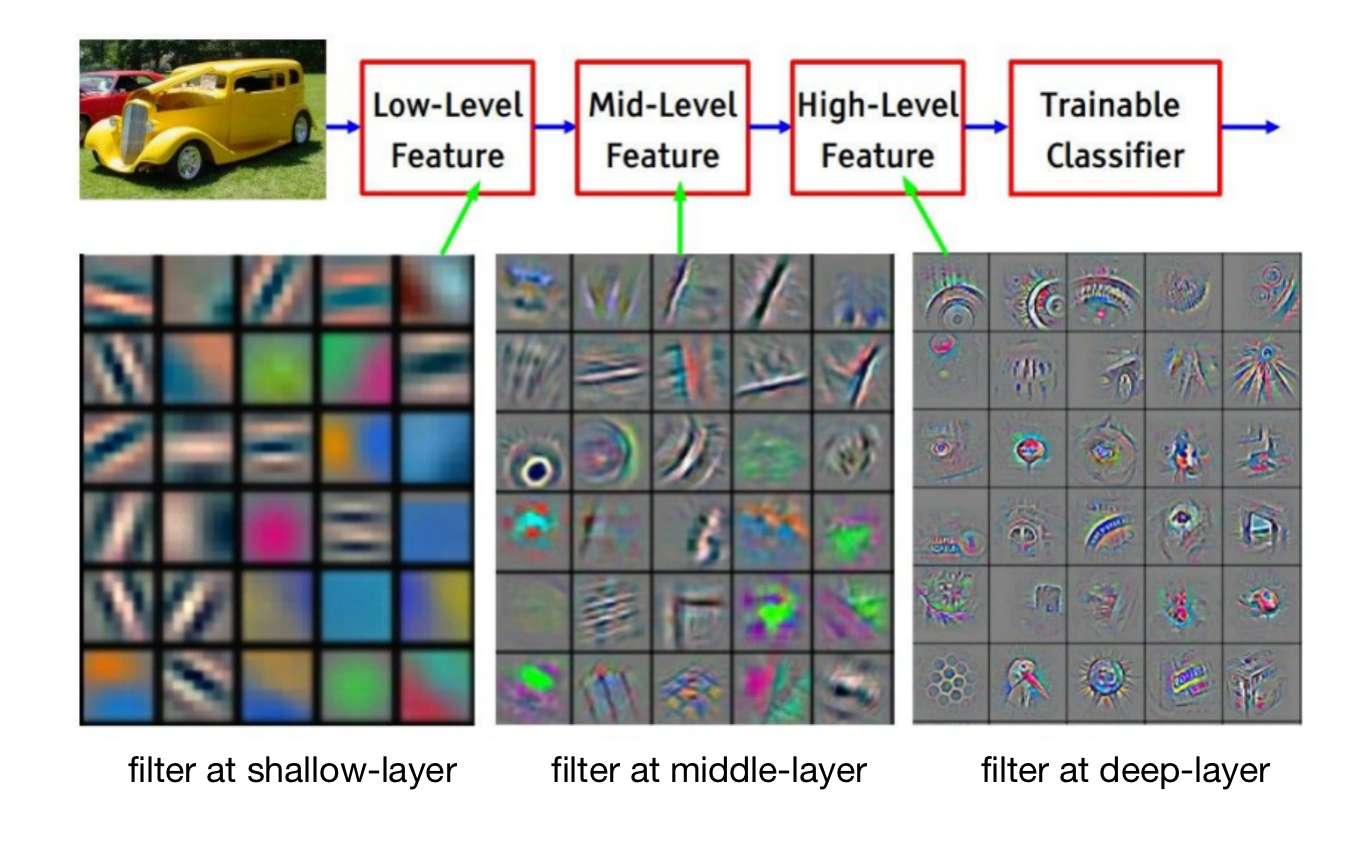

## compare upsampling vs. deconv, downsampling vs conv

| Technique           | Pros                                           | Cons                                           |
|---------------------|------------------------------------------------|------------------------------------------------|
| Upsampling          | Computationally efficient <br> Simple to implement | interpolation rather than learning <br> artifacts or blurriness |
| Deconvolution | Learnable parameters, can adapt to specific tasks and data <br>smoother results | Computationally expensive <br> checkerboard artifact |
| Downsampling        | Computationally efficient <br> Efficient feature extraction | aliasing artifact <br> May lose important information |
| Convolution         | Learnable parameters <br> Local feature extraction | Computationally expensive <br> aliasing artifact|


## upsampling and downsampling

Upsampling and downsampling are techniques to modify size of images while preserving their overall structure and content for different layers requiring images of varying resolutions.

Upsampling and downsampling focus on reducing computational complexity, not involve learning parameters

Upsampling:

- Increasing the resolution or size of an image.

- methods: nearest-neighbor, bilinear, bicubic interpolation.

    - Nearest-neighbor interpolation: Assigns the value of the nearest pixel to each new pixel. Fast but can result in blocky images.

    - Bilinear interpolation: Averages the values of the four nearest pixels, weighted by their distance to the new pixel. Smoother results but slightly slower.
    
    - Bicubic interpolation: Considers 16 neighboring pixels, using a cubic function to determine weights. Smoother than bilinear but slower.


Downsampling:

- Decrease resolution or size of an image.

- methods: average pooling, Gaussian blur, and decimation.

    - Subsampling: Selects every n-th pixel from the image, discarding the rest. Fast but can result in aliasing artifacts.

    - Average pooling: Divides the image into non-overlapping regions and assigns the average value of each region to the new pixel. Reduces aliasing but can blur edges.
    
    - Max pooling: Similar to average pooling, but assigns the maximum value of each region to the new pixel. Better at preserving edges.

## convolution and deconvolution

deconvolution and convolution emphasize learning patterns and features from the data.

convolution

- use a learnable kernel to generate an output with smaller spatial dimensions than the input.


deconvolution/Transposed convolution/fractionally-strided convolution

- use a learnable kernel to generate an output with larger spatial dimensions than the input.

filter: 

- different filters at same layer detect a particular feature, e.g., Gaussian blur (approximation), box blur (normalized), sharpen, edge detection, identity

- filters at layer of different depth detect features of different level, e.g., shallower layers detect eys and mouths, deeper layers detect body.

    
feature map/convolved feature

- output of conv layer, embedding of images. 

- calculated by pointwise multiply input and filter, sum over results, then move a stride.

hyperparameters:

- weight and height of filter: typically weight = height

- stride: controls how many pixels of an image to slide over

- padding: zero padding is padding 0s to outside of an image

- depth: number of filters = number of features to detect = number of features maps

In [13]:
from IPython.display import HTML

# Replace 'path/to/your/gif1.gif' and 'path/to/your/gif2.gif' with the paths to the GIF files you want to display
gif1_url = 'https://maucher.home.hdm-stuttgart.de/Pics/gif/padding_strides.gif'
gif2_url = 'https://maucher.home.hdm-stuttgart.de/Pics/gif/padding_strides_transposed.gif'

# Replace 'Title 1' and 'Title 2' with the titles you want for the GIFs
title1 = 'Convolution padding = 1, stride = 2'
title2 = 'Deconv padding = 1, stride = 2'

# Create an HTML table to align the GIFs and their titles
html_string = f"""
<table>
    <tr>
    blue square: input; grey square: filter. dash: padding; green square: output
    </tr>
    <tr>
        <td style="text-align: center;">{title1}<br><img src="{gif1_url}" alt="gif1"></td>
        <td style="text-align: center;">{title2}<br><img src="{gif2_url}" alt="gif2"></td>
    </tr>
</table>
"""

# Display the GIFs with titles in the notebook
HTML(html_string)


## visualize feature map and learned filter give insight

[visualize filters in each layer](https://adamharley.com/nn_vis/)

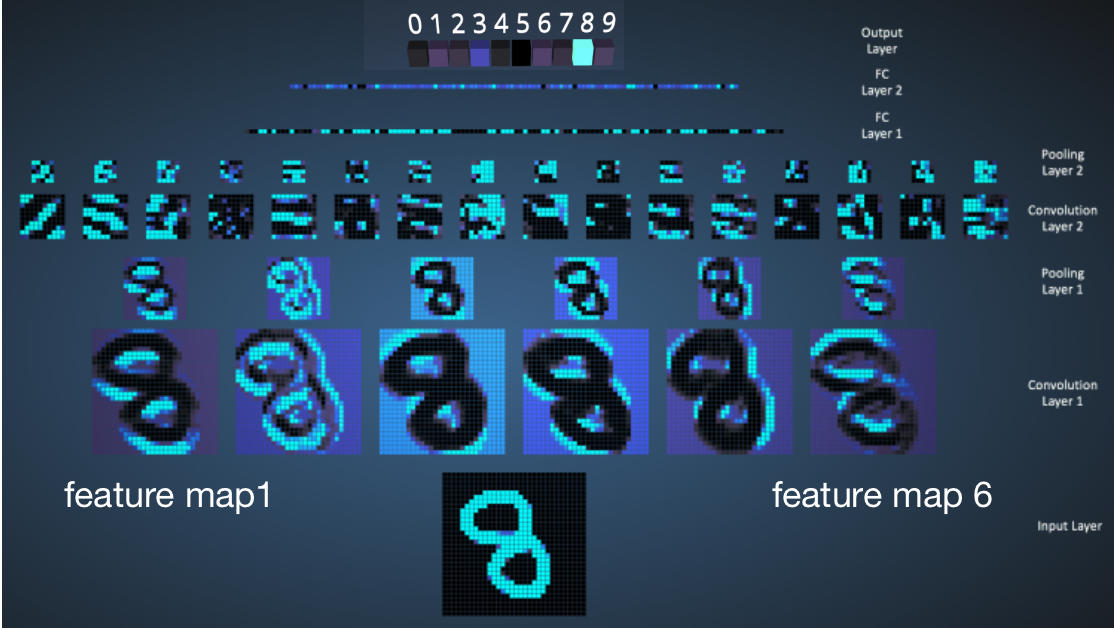

In [14]:
Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ixuhX9vaf1kUQTWicVYiyg.png')

## filter-wise normalization

Filter-wise normalization is a technique used in convolutional neural networks to normalize the output of each filter in a layer. The idea behind this is to ensure that each filter has a similar range of values, which can help prevent the saturation of individual filters and improve the overall performance of the network.

The formula for filter-wise normalization is as follows:

\begin{equation}
x_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{k=1}^{n} (x_{kj} - \mu_j)^2 + \epsilon}}
\end{equation}

In this formula, $x_{ij}$ is the output of the $i$ th filter at the $j$th spatial location, $n$ is the number of filters, $\mu_j$ is the mean activation across all filters at the $j$ th spatial location, and $\epsilon$ is a small constant to prevent division by zero.

By normalizing the output of each filter, filter-wise normalization can help prevent the saturation of individual filters and improve the overall performance of the network.

# Inception

Inception network (also known as GoogLeNet) is a deep CNN architecture designed for image classification.

## inception module

Inception module is a key building block of Inception


Key Points:

- Multi-scale processing: Inception modules enable the network to process input data in parallel and capture various features at different scales by applying convolutional filters of different kernel sizes and pooling operations simultaneously.

- Dimensionality reduction: Before applying larger convolutional filters, 1x1 convolutions are used to reduce the number of channels in the input data, which reduces computational complexity and memory usage.

- Concatenation of outputs: The outputs from the different convolutional and pooling branches are concatenated channel-wise, allowing the network to learn a richer and more diverse set of features.

- Increased network depth and width: The Inception module's design allows for deeper and wider architectures compared to traditional CNN, which can improve expressiveness and ability to learn complex patterns.

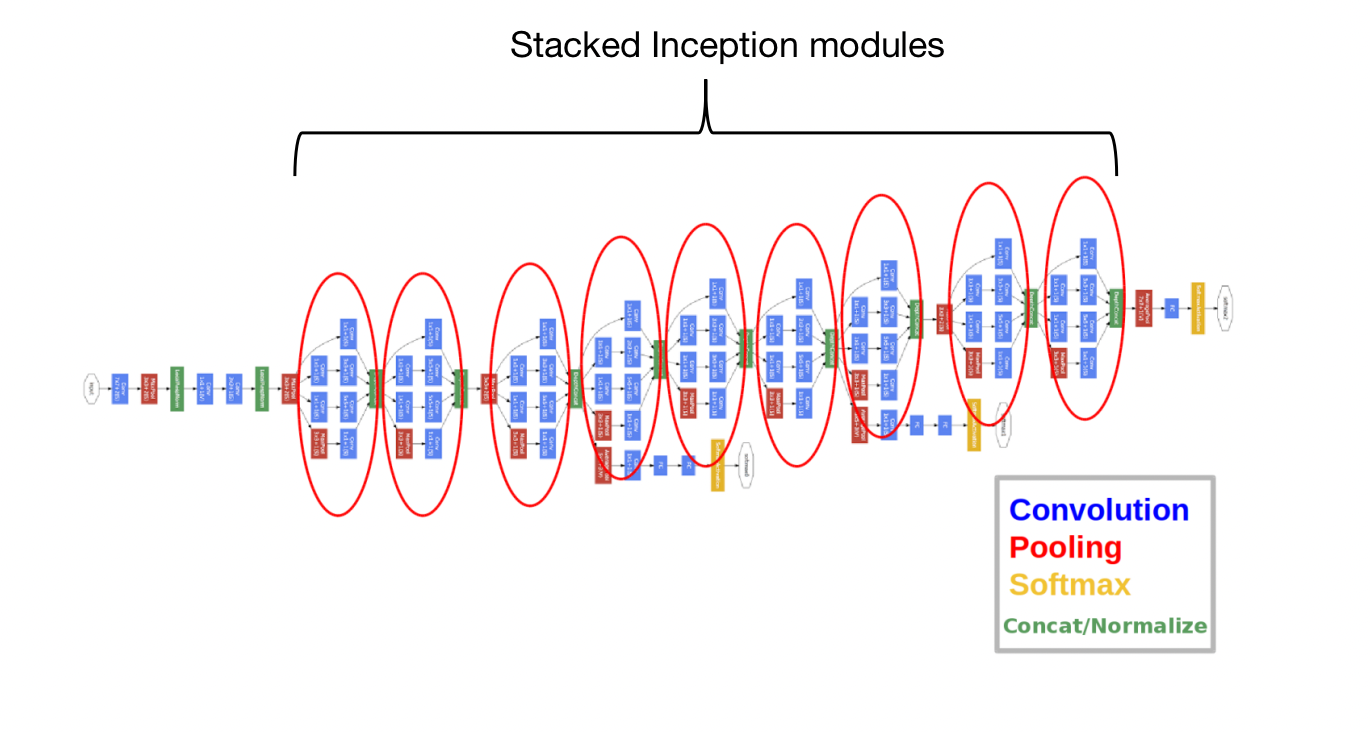

a simple Inception module have following components:

- 1x1 conv branch

- 3x3 conv branch, preceded by 1x1 conv for dim reduction

- 5x5 conv branch, preceded by 1x1 conv for dim reduction

- Max-pooling branch, followed by 1x1 conv for dim reduction

The outputs of all these branches are concatenated to form the final output of the Inception module.

In [7]:
Image(url='https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-22_at_3.22.39_PM.png')

## 1x1 convolution

In [1]:
from IPython.display import Image
Image(url='https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/3D_1D_cropped.gif')

A 1x1 convolution (pointwise convolution): a convolutional operation with a kernel size of 1x1. 

use cases:

- Dimensionality reduction: By reducing the number of output channels while preserving the spatial dimensions of the input, decrease the complexity of the model.

- Increasing non-linearity: Introducing 1x1 convolutions between other convolutional layers adds more non-linearity to the network, potentially improving its expressiveness.

# ResNet (Residual Networks)

## Residual block

In [2]:
# from IPython.display import Image
Image(url='https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png')

Skip Connection:
$z = x + F(x)$

Where:
- $z$: Output of the residual block
- $x$: Input to the residual block
- $F(x)$: Residual function learned by the intermediate layers

Derivative of output w.r.t $x$:

$$\frac{dz}{dx} = \frac{dx}{dx} + \frac{dF(x)}{dx}=1+\frac{dF(x)}{dx}$$

No matter what derivative of $F$ is, derivative going through identity branch is always constant.


## skip-connection

Skip-connections: also known as shortcut connections or residual connections, are a key component of ResNet. 

They enable the direct flow of information from earlier layers to later layers by "skipping" one or more intermediate layers in the network.


- Identity mapping: Skip-connections create an identity mapping between the input and output of a block of layers. They allow the output to be the sum of the input and the residual learned by the block, promoting the learning of **residual functions** instead of the entire transformation.

- Addressing Vanishing Gradient by direct gradient flow: Skip-connections create direct paths for the gradient to flow from output layer to input layer during backpropagation. This prevents the gradient from diminishing as it moves through the network, ensuring that the weights in earlier layers are updated more effectively, make it easier to train deeper networks.

- smoother loss landscape

In [6]:
Image(url='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*_Qd_txKxRlsMdfuH2J-k4g.png')

# Convolutional AutoEncoder (CAE)

## architecture

conv Autoencoder has similar architecture as Autoencoder, except FC layers change to convolutional layers

- encoder (conv layers and pooling layers)

- decoder (transpose conv and upsampling)

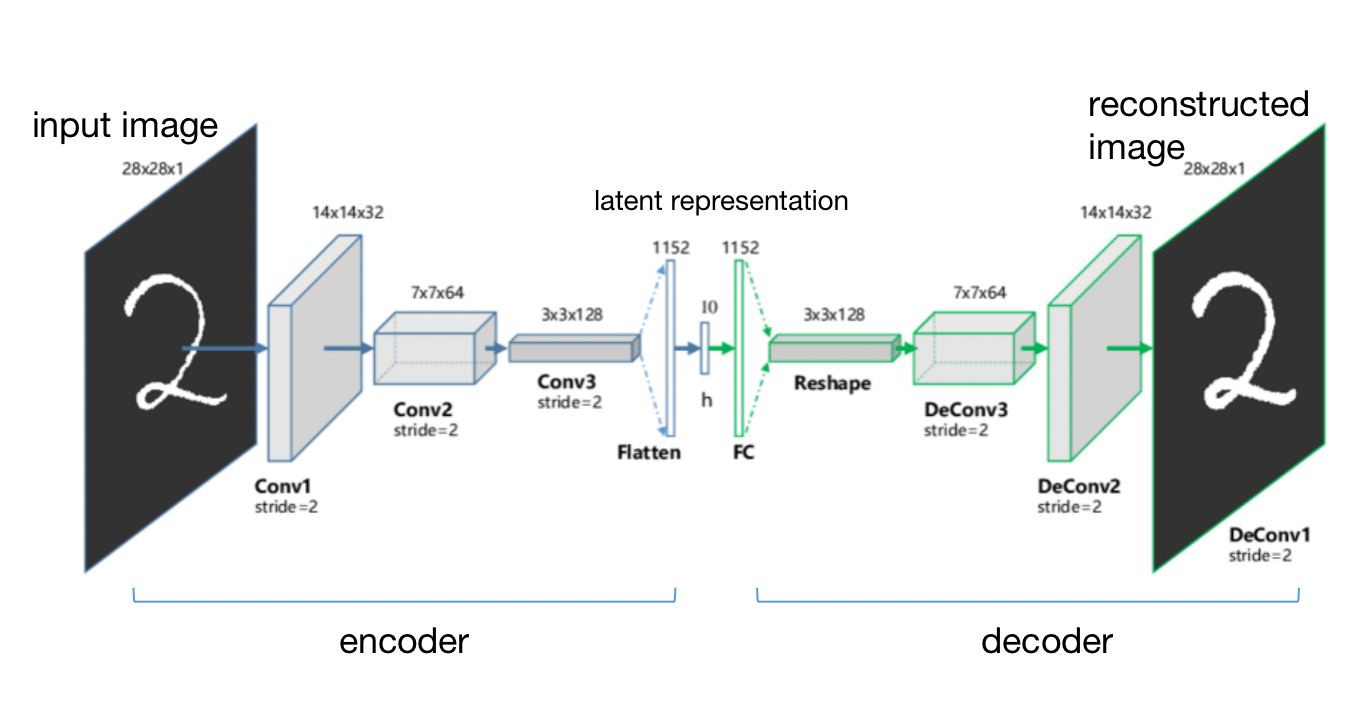

## application

CNN architecture makes CAE well-suited for processing data with spatial structure, such as images. 

- Dimensionality reduction

- Image denoising

- Feature learning

- Anomaly detection: By training a CAE on normal data samples, it can learn to reconstruct typical samples accurately. Anomalies can then be detected by measuring the reconstruction error between the input and the reconstructed output for new samples.

- Image inpainting: CAEs can be used to fill in missing or corrupted parts of an image by learning to reconstruct the complete image from the available data.

- Generative models: CAEs can be adapted into generative models, such as Variational Autoencoders (VAEs) or Adversarial Autoencoders (AAEs), to generate new data samples similar to the training data.

- Image segmentation: CAEs can be extended to other architectures, like U-Net, to learn pixel-level classification for tasks such as semantic segmentation.

# artifact

| Artifact Type | Description                                       | Reason                                    | Solution                                              |
|---------------|---------------------------------------------------|-------------------------------------------|-------------------------------------------------------|
| Checkerboard  | Regular grid-like patterns in output images      | Improper deconv   | upsampling followed by conv, or properly designed decov (e.g., initializing weights with bilinear interpolation) |
| Aliasing      | Jagged edges or moiré patterns in output images | Undersampling of high-frequency components | downsampling (average/max pool) before conv, or low-pass filter |


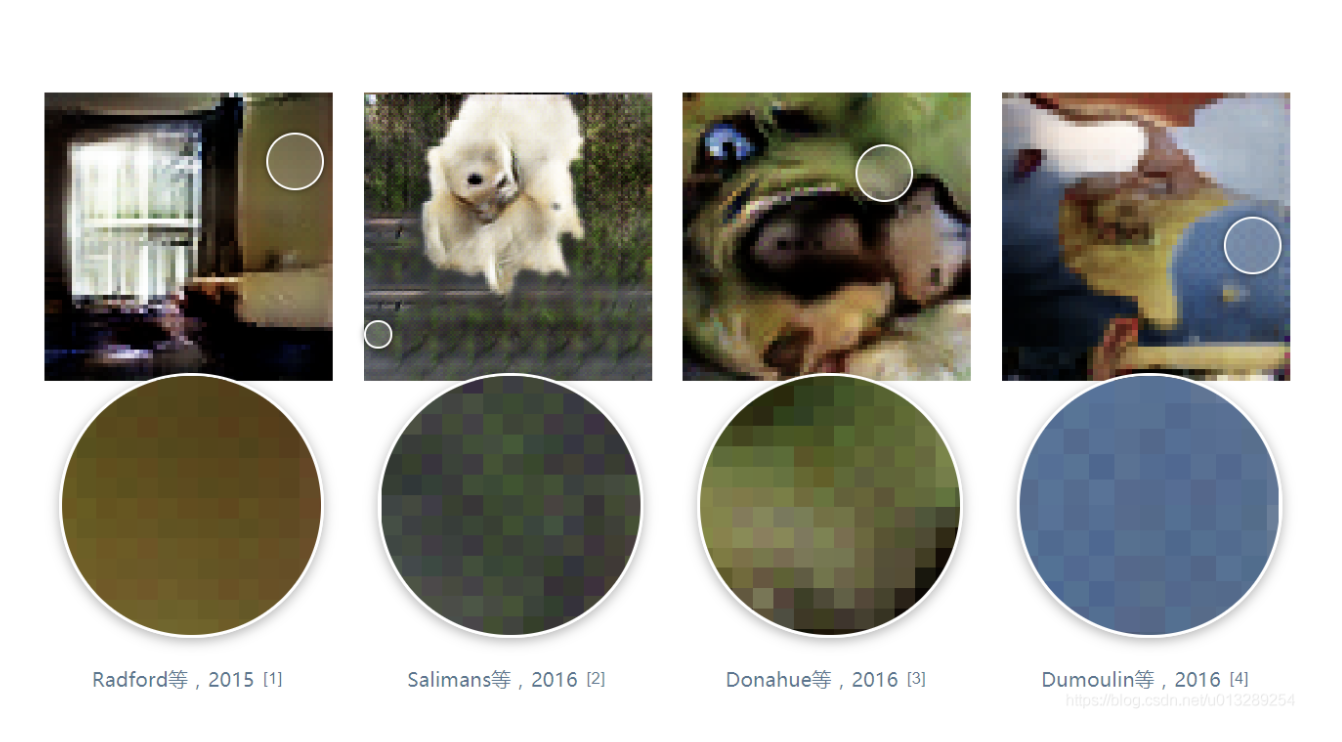